소프트웨어학부 20186663 전찬웅

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1



In [85]:
num_list1 = [0,0,0,0,0,0,0,0,0,0]
num_images = np.empty((size_row * size_col, 10), dtype=float)
for i in range(10000):
    for j in range(10):
        if list_label[i] ==j:
            num_list1[j]+=1
            num_images[:,j] += list_image[:,i]
        

In [86]:
final_num_images = np.empty((size_row * size_col, 10), dtype=float)
for i in range(10):
    final_num_images[:,i] = num_images[:,i]/num_list1[i]

In [87]:
theta = np.random.randn(28*28,1)
Z = 1/(1+np.exp(-np.dot(list_image.T,theta)))

/home/jeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [89]:
num_list2 = [0,0,0,0,0,0,0,0,0,0]
for i in range(10000):
    for j in range(10):
        if list_label[i] == j:
            num_list2[j] += Z[i,0]
for i in range(10):
    num_list2[i] = num_list2[i]/num_list1[i]

# Conclusion

- Plot the average image [5pt]

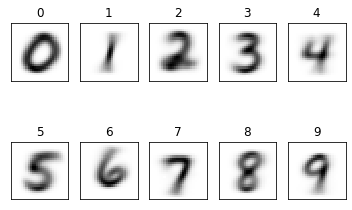

In [76]:
for i in range(10):

    label       = i
    im_vector   = final_num_images[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

- Present the output of the neural network with random weights [9pt]

In [91]:
for i in range(10):
    print(i," : ",num_list2[i])

0  :  0.0714244571238637
1  :  0.21710378276920453
2  :  0.2983235360094716
3  :  0.16930693197685
4  :  0.30037306854128193
5  :  0.1331777790564997
6  :  0.21535018705385495
7  :  0.5087525170758456
8  :  0.3286241487061776
9  :  0.2885437424992515
